In [1]:
import os
os.environ['AEON_DEPRECATION_WARNING'] = 'False'

import os
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

import sys
sys.path.append("../")

from aeon.visualisation import plot_critical_difference

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
date = "30-01-25"   # new

path = "TLB_logs/"
files = [#"tlb_all_ucr_16_2-"+date+".csv",
         "tlb_all_ucr_16_4-"+date+".csv",
         "tlb_all_ucr_16_8-"+date+".csv",
         "tlb_all_ucr_16_16-"+date+".csv",
         "tlb_all_ucr_16_32-"+date+".csv",
         "tlb_all_ucr_16_64-"+date+".csv",
         "tlb_all_ucr_16_128-"+date+".csv",
         "tlb_all_ucr_16_256-"+date+".csv"]

configs = [4, 8, 16, 32, 64, 128, 256] # 2, 
df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)
    
    mapping = {"sfa_equi-depth_False": "SFA ED", # + str(configs[i]),
               "sfa_equi-depth_True": "SFA ED +VAR", # + str(configs[i]),
               "sfa_equi-width_False": "SFA EW", # + str(configs[i]),
               "sfa_equi-width_True": "SFA EW +VAR", # + str(configs[i]),
               "isax": "iSAX",
               }
    
    for key in mapping:
        df.Method = df.Method.replace({key: mapping[key]})
    
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.357050,4
1,SFA EW +VAR,ArrowHead,0.606595,4
2,SFA EW,ArrowHead,0.593721,4
3,SFA ED +VAR,ArrowHead,0.647075,4
4,SFA ED,ArrowHead,0.637338,4
...,...,...,...,...
590,iSAX,Yoga,0.933442,256
591,SFA EW +VAR,Yoga,0.982416,256
592,SFA EW,Yoga,0.982416,256
593,SFA ED +VAR,Yoga,0.980372,256


In [3]:
# ASAX!
date = "30-01-25"   # new

path = "TLB_logs/"
files = ["tlb_all_ucr_ASAX_16_4-"+date+".csv",
         "tlb_all_ucr_ASAX_16_8-"+date+".csv",
         "tlb_all_ucr_ASAX_16_16-"+date+".csv",
         "tlb_all_ucr_ASAX_16_32-"+date+".csv",
         "tlb_all_ucr_ASAX_16_64-"+date+".csv",
         "tlb_all_ucr_ASAX_16_128-"+date+".csv",
         "tlb_all_ucr_ASAX_16_256-"+date+".csv"]

# df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)        
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.357050,4
1,SFA EW +VAR,ArrowHead,0.606595,4
2,SFA EW,ArrowHead,0.593721,4
3,SFA ED +VAR,ArrowHead,0.647075,4
4,SFA ED,ArrowHead,0.637338,4
...,...,...,...,...
27,ASAX,SonyAIBORobotSurface1,0.586334,256
28,ASAX,SonyAIBORobotSurface2,0.610989,256
29,ASAX,SyntheticControl,0.710000,256
30,ASAX,TwoLeadECG,0.746334,256


In [4]:
# SAX-TD!
date = "30-01-25"   # new

path = "TLB_logs/"
files = ["tlb_all_ucr_SAX_TD_16_4-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_8-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_16-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_32-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_64-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_128-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_256-"+date+".csv"]

# df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)        
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.357050,4
1,SFA EW +VAR,ArrowHead,0.606595,4
2,SFA EW,ArrowHead,0.593721,4
3,SFA ED +VAR,ArrowHead,0.647075,4
4,SFA ED,ArrowHead,0.637338,4
...,...,...,...,...
114,SAX-TD,Wine,0.286855,256
115,SAX-TD,WordSynonyms,0.546495,256
116,SAX-TD,Worms,0.500199,256
117,SAX-TD,WormsTwoClass,0.500199,256


In [5]:
df[["Method", "TLB", "Config"]] \
        .groupby(["Method", "Config"]).median() \
        .sort_values(by=["Config", "Method"], ascending=True)

,,TLB
Method,Config,
ASAX,4,0.169294
SAX-TD,4,0.109752
SFA ED,4,0.595272
SFA ED +VAR,4,0.596170
SFA EW,4,0.562291
SFA EW +VAR,4,0.566941
iSAX,4,0.430142
ASAX,8,0.332245
SAX-TD,8,0.250484


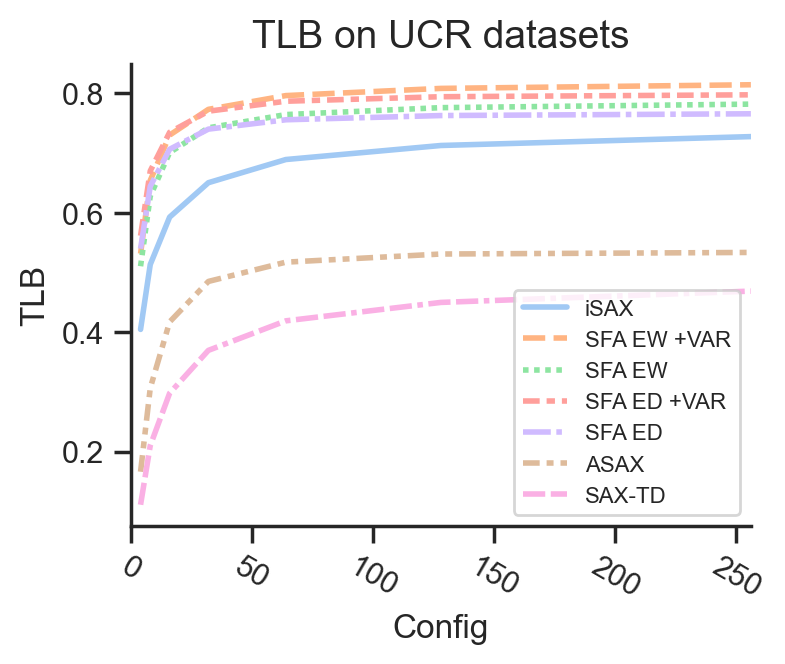

In [6]:
sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(4,3))

ax = sns.lineplot(
    x="Config", y="TLB", hue="Method", style="Method",  
    data=df, err_style="bars", errorbar=("se", 0), ax=ax, lw=2
)
ax.set_title("TLB on UCR datasets", fontsize=14)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30)
ax.set_xlim([0,256])
sns.despine()
plt.legend(fontsize=8)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.show()
# plt.tight_layout()
plt.savefig("images/tlb_ucr_lineplot"+date+".pdf", bbox_inches='tight')

In [7]:
#df[["Config", "Method", "TLB"]] \
#        .groupby(["Config", "Method"]).median() \
#        .sort_values(by=["Config", "TLB"], ascending=False).reset_index()[["Config", "Method"]]

In [12]:
df_sub = df[df.Method.isin(["SFA EW +VAR", "SFA ED +VAR", "iSAX", "ASAX", "SAX-TD"])]
result = df_sub[["Config", "Method", "TLB"]] \
        .groupby(["Config", "Method"]).mean() \
        .pivot_table(columns="Config", index="Method")

result

TLB                                                    \
Config            4         8         16        32        64        128   
Method                                                                    
ASAX         0.166206  0.306240  0.417217  0.485043  0.517349  0.530981   
SAX-TD       0.110889  0.209966  0.297729  0.369564  0.419032  0.449889   
SFA ED +VAR  0.561558  0.670176  0.734890  0.770287  0.786968  0.794536   
SFA EW +VAR  0.531584  0.654206  0.730231  0.773368  0.796433  0.808464   
iSAX         0.404683  0.513403  0.592813  0.650460  0.689309  0.712807   

                       
Config            256  
Method                 
ASAX         0.533628  
SAX-TD       0.468839  
SFA ED +VAR  0.797714  
SFA EW +VAR  0.814578  
iSAX         0.727703

In [13]:
print(result.to_markdown())

| Method      |   ('TLB', 4) |   ('TLB', 8) |   ('TLB', 16) |   ('TLB', 32) |   ('TLB', 64) |   ('TLB', 128) |   ('TLB', 256) |
|:------------|-------------:|-------------:|--------------:|--------------:|--------------:|---------------:|---------------:|
| ASAX        |     0.166206 |     0.30624  |      0.417217 |      0.485043 |      0.517349 |       0.530981 |       0.533628 |
| SAX-TD      |     0.110889 |     0.209966 |      0.297729 |      0.369564 |      0.419032 |       0.449889 |       0.468839 |
| SFA ED +VAR |     0.561558 |     0.670176 |      0.73489  |      0.770287 |      0.786968 |       0.794536 |       0.797714 |
| SFA EW +VAR |     0.531584 |     0.654206 |      0.730231 |      0.773368 |      0.796433 |       0.808464 |       0.814578 |
| iSAX        |     0.404683 |     0.513403 |      0.592813 |      0.65046  |      0.689309 |       0.712807 |       0.727703 |


In [14]:
print(result.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} & \multicolumn{7}{l}{TLB} \\
Config &       4   &       8   &       16  &       32  &       64  &       128 &       256 \\
Method      &           &           &           &           &           &           &           \\
\midrule
ASAX        &  0.166206 &  0.306240 &  0.417217 &  0.485043 &  0.517349 &  0.530981 &  0.533628 \\
SAX-TD      &  0.110889 &  0.209966 &  0.297729 &  0.369564 &  0.419032 &  0.449889 &  0.468839 \\
SFA ED +VAR &  0.561558 &  0.670176 &  0.734890 &  0.770287 &  0.786968 &  0.794536 &  0.797714 \\
SFA EW +VAR &  0.531584 &  0.654206 &  0.730231 &  0.773368 &  0.796433 &  0.808464 &  0.814578 \\
iSAX        &  0.404683 &  0.513403 &  0.592813 &  0.650460 &  0.689309 &  0.712807 &  0.727703 \\
\bottomrule
\end{tabular}



/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_42939/829127250.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(result.to_latex())


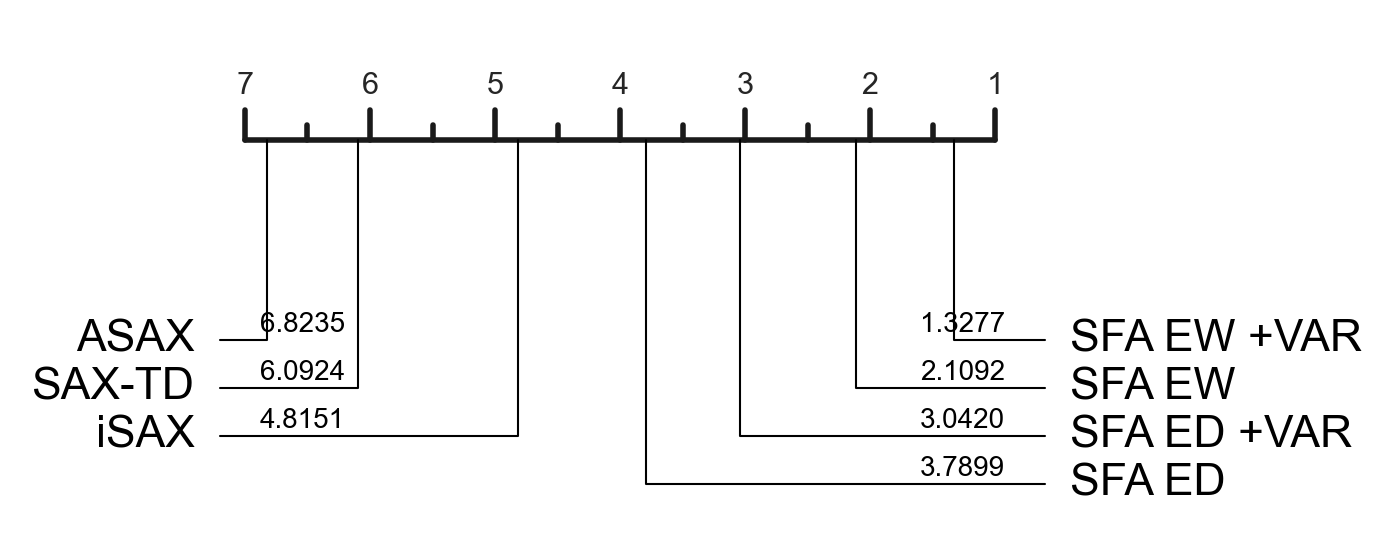

In [15]:
df_pivot = df[df.Config==256].pivot(index='Dataset', columns='Method', values='TLB')
df_pivot.fillna(0, inplace=True)
ax = plot_critical_difference(
    scores=df_pivot.to_numpy(),
    labels=df_pivot.columns.to_numpy(),
    #errors=False,
    #clique_method="holm",
    alpha=0.05,
)
#plt.tight_layout()
plt.savefig("images/tlb_UCR_cd_diagramm"+date+".pdf", bbox_inches='tight')